In [1]:
import nltk
#nltk.download()

In [2]:
messages = [line.rstrip() for line in open ('SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
import pandas as pd

In [5]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
messages[messages['length']==messages['length'].max()]['message'].iloc[0]
#messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC744DA828>,
      dtype=object)

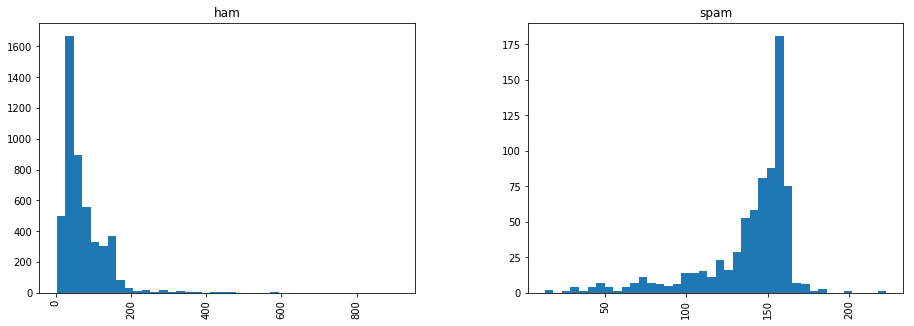

In [12]:
#visua;lize ham and spam based on 
messages.hist(column='length',by='label',bins=40,figsize=(15,5))

In [13]:
import string
mess = 'Sample message! notice: it has punctuation.'
nopunc= [char for char in mess if char not in string.punctuation]

nopunc = ''.join(nopunc)
nopunc

'Sample message notice it has punctuation'

In [14]:
#remove stop words
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
nopunc.split()

['Sample', 'message', 'notice', 'it', 'has', 'punctuation']

In [16]:
clean_mess =[word for word in nopunc.split()
            if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'notice', 'punctuation']

In [17]:
def test_process(mess):
    nopunc= [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc


def clean(nopunc):
    clean_mess =[word for word in nopunc.split()
            if word.lower() not in stopwords.words('english')]
    return clean_mess

mess1 =test_process('Sample message! notice: it has punctuation.')
mess1

'Sample message notice it has punctuation'

In [18]:
clean(mess1)

['Sample', 'message', 'notice', 'punctuation']

In [19]:
def textprocess(mess):
    nopunc= [char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split()
            if word.lower() not in stopwords.words('english')]
    
textprocess('Sample message! notice: it has punctuation.')
  

['Sample', 'message', 'notice', 'punctuation']

In [20]:
messages['message'].head(5).apply(textprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
bow_transformer = CountVectorizer(analyzer = textprocess).fit(messages['message'])

print(len(bow_transformer.vocabulary_))

11425


In [23]:
message_ = messages['message'][6]
message_

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [24]:
bow_ = bow_transformer.transform([message_])
print(bow_)
print(bow_.shape)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1
(1, 11425)


In [25]:
mesages_bow = bow_transformer.transform(messages['message'])
mesages_bow

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [26]:
print(bow_transformer.get_feature_names()[7800])
print(bow_transformer.get_feature_names()[4590])

like
aids


In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(mesages_bow)
tfidf_ = tfidf_transformer.transform(bow_)
print(tfidf_)

  (0, 10629)	0.3352766696931058
  (0, 9971)	0.3268691780062757
  (0, 8761)	0.43700993321905807
  (0, 7800)	0.41453906826037096
  (0, 5193)	0.33843411088434017
  (0, 4590)	0.43700993321905807
  (0, 1802)	0.3352766696931058


In [28]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['p']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['phone']])

8.527076498901426
4.9252084217771195


In [29]:
messages_tfidf = tfidf_transformer.transform(mesages_bow)
print(messages_tfidf.shape)

(5572, 11425)


### MODEL: NaiveBayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label']) #using the entire dataset

In [32]:
print('predicted:',spam_detect_model.predict(tfidf_)[0])
print('Expected:',messages.label[6])

predicted: ham
Expected: ham


### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


### Data Pipeline

In [34]:
from sklearn.pipeline import Pipeline

In [36]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=textprocess)),
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()),
])              

In [37]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function textprocess at 0x000001FC74595950>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [39]:
from sklearn.metrics import classification_report
predictions = pipeline.predict(msg_test)

In [40]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1007
       spam       0.73      1.00      0.85       108

avg / total       0.97      0.97      0.97      1115

